## 01. 데이터셋 준비하기

IMDB 리뷰 데이터셋은 텍스트로부터 감정을 분석하고, 학습 및 분류하기 위한 데이터셋입니다.

긍정적 (positive) 또는 부정적 (negative)로 분류된 50,000개의 영화 리뷰 텍스트를 포함하며, 25,000개는 훈련에 사용되고, 25,000개는 테스트에 사용합니다.

Google Colab을 사용하는 경우 TensorFlow Datasets이 이미 설치되어 있습니다. 자신의 환경에서 TensorFlow Datasets이 설치되어 있지 않다면 명령 프롬프트에서 아래의 명령어를 통해 TensorFlow Datasets를 설치합니다.

In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

2022-01-01 12:30:02.554722: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-01 12:30:02.557092: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


TensorFlow Datasets의 설치가 완료되었다면, 아래와 같이 tensorflow_datasets 모듈을 불러옵니다.

Google Colab 환경에서 처음으로 모듈을 불러와서 코드셀을 실행했을 때, 아래와 같이 출력된다면 데이터셋이 준비된 것입니다

<img src="./figure/natural_language_processing_in_tensorflow_07.png" width="400">

## 02. 데이터셋 살펴보기

이제 준비한 영화 리뷰 데이터셋을 훈련과 테스트에 적절한 형태로 처리하고, 첫번째 데이터를 출력해 보겠습니다.

In [11]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

for s, l in train_data:
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())

for s, l in test_data:
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

print(train_sentences[0])
print(train_labels[0])
print(test_sentences[0])
print(test_labels[0])

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of th

리스트 train_sentences, train_labels, test_sentences, test_labels는 각각 훈련과 테스트에 사용할 리뷰 텍스트 문장과 레이블입니다.

리뷰가 긍정적이라면 1, 부정적이라면 0으로 레이블되어 있습니다.

In [12]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

np.array()를 사용해서 레이블을 NumPy 어레이로 변환해줍니다.

## 03. 리뷰 문장 토큰화하기

In [13]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length)

print(sequences[0])
print(padded[0])

print(test_sequences[0])
print(test_padded[0])

[59, 12, 14, 35, 439, 400, 18, 174, 29, 1, 9, 33, 1378, 3401, 42, 496, 1, 197, 25, 88, 156, 19, 12, 211, 340, 29, 70, 248, 213, 9, 486, 62, 70, 88, 116, 99, 24, 5740, 12, 3317, 657, 777, 12, 18, 7, 35, 406, 8228, 178, 2477, 426, 2, 92, 1253, 140, 72, 149, 55, 2, 1, 7525, 72, 229, 70, 2962, 16, 1, 2880, 1, 1, 1506, 4998, 3, 40, 3947, 119, 1608, 17, 3401, 14, 163, 19, 4, 1253, 927, 7986, 9, 4, 18, 13, 14, 4200, 5, 102, 148, 1237, 11, 240, 692, 13, 44, 25, 101, 39, 12, 7232, 1, 39, 1378, 1, 52, 409, 11, 99, 1214, 874, 145, 10]
[   0    0   59   12   14   35  439  400   18  174   29    1    9   33
 1378 3401   42  496    1  197   25   88  156   19   12  211  340   29
   70  248  213    9  486   62   70   88  116   99   24 5740   12 3317
  657  777   12   18    7   35  406 8228  178 2477  426    2   92 1253
  140   72  149   55    2    1 7525   72  229   70 2962   16    1 2880
    1    1 1506 4998    3   40 3947  119 1608   17 3401   14  163   19
    4 1253  927 7986    9    4   18   13   1

우선 토큰화할 단어의 수, 최대 길이와 같은 하이퍼 파라미터들을 먼저 지정하고,

Tokenizer와 pad_sequences() 함수를 불러옵니다.

fit_on_texts를 이용해서 단어를 토큰화하고, texts_to_sequences를 이용해서 숫자의 시퀀스로 다시 변환합니다.

pad_sequences는 Neural Network의 훈련에 적합하도록 이 시퀀스의 길이를 일정하게 만들어줍니다.

## 04. 모델 구성하기

In [14]:
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


Embedding 레어이는 텍스트의 감정 분석에 있어서 핵심적인 부분입니다.

임베딩의 결과는 (vocab_size, embedding_dim)의 형태를 갖는 2차원 어레이가 되고,

이미지 분류 문제에서와 마찬가지로 Flatten 레이어를 사용해서 이 2차원 어레이를 1차원으로 변환합니다.

## 05. 모델 컴파일하기

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

compile() 메서드를 이용해서 손실 함수와 옵티마이저를 지정해줍니다.

## 06. 모델 훈련하기

In [16]:
num_epochs = 10
hist = model.fit(padded, train_labels, epochs=num_epochs,
        validation_data=(test_padded, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 6s 225us/sample - loss: 0.5018 - accuracy: 0.7308 - val_loss: 0.3556 - val_accuracy: 0.8431
Epoch 2/10
25000/25000 [==============================] - 5s 201us/sample - loss: 0.2454 - accuracy: 0.9036 - val_loss: 0.3618 - val_accuracy: 0.8426
Epoch 3/10
25000/25000 [==============================] - 5s 199us/sample - loss: 0.0983 - accuracy: 0.9736 - val_loss: 0.4416 - val_accuracy: 0.8283
Epoch 4/10
25000/25000 [==============================] - 5s 197us/sample - loss: 0.0255 - accuracy: 0.9966 - val_loss: 0.5405 - val_accuracy: 0.8231
Epoch 5/10
25000/25000 [==============================] - 5s 199us/sample - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.5986 - val_accuracy: 0.8234
Epoch 6/10
25000/25000 [==============================] - 5s 199us/sample - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6473 - val_accuracy: 0.8260
Epoch 7/10
25000/25000 [==========================

10회의 에포크 (epoch) 동안 훈련을 거치고 나면,

훈련 데이터에 대해 1.0의 정확도, 테스트 데이터에 대해 0.8293의 정확도를 보이는 것을 알 수 있습니다.

# 시각화 해보기

In [18]:
import matplotlib.pyplot as plt

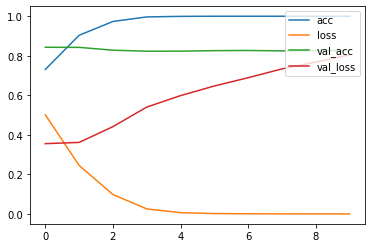

In [23]:
plt.plot(hist.history['accuracy'],label = 'acc')
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_accuracy'],label = 'val_acc')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend(loc = 'upper right')
plt.show()

# GlobaAveragePooling1D 레이어 사용해서 다시 신경망 구축해보기

In [24]:
import tensorflow as tf

model1 = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  # tf.keras.layers.Flatten(),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


Flatten 레이어 대신, GlobaAveragePooling1D 레이어를 사용할 수 있습니다.

훈련 과정이 조금 더 빨라지는 대신, 정확도가 조금 감소합니다.

In [26]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
num_epochs = 10
hist = model1.fit(padded, train_labels, epochs=num_epochs,
        validation_data=(test_padded, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 210us/sample - loss: 0.5572 - accuracy: 0.7507 - val_loss: 0.3994 - val_accuracy: 0.8384
Epoch 2/10
25000/25000 [==============================] - 5s 188us/sample - loss: 0.3413 - accuracy: 0.8599 - val_loss: 0.3345 - val_accuracy: 0.8574
Epoch 3/10
25000/25000 [==============================] - 5s 188us/sample - loss: 0.2765 - accuracy: 0.8892 - val_loss: 0.3327 - val_accuracy: 0.8561
Epoch 4/10
25000/25000 [==============================] - 5s 184us/sample - loss: 0.2399 - accuracy: 0.9078 - val_loss: 0.3400 - val_accuracy: 0.8552
Epoch 5/10
25000/25000 [==============================] - 5s 186us/sample - loss: 0.2128 - accuracy: 0.9200 - val_loss: 0.3594 - val_accuracy: 0.8491
Epoch 6/10
25000/25000 [==============================] - 5s 187us/sample - loss: 0.1926 - accuracy: 0.9301 - val_loss: 0.3837 - val_accuracy: 0.8431
Epoch 7/10
25000/25000 [==========================

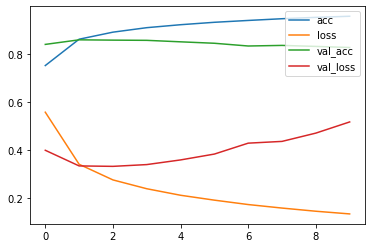

In [28]:
plt.plot(hist.history['accuracy'],label = 'acc')
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_accuracy'],label = 'val_acc')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend(loc = 'upper right')
plt.show()